-------------------0805+2818a-------------------
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[OII]3726' '[OII]3729' '[SII]6716'
 '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:        -5       220     0.083     0.088
 comp. 1:       -97       253
 comp. 2:      -115       316
chi2/DOF: 3.087
method = capfit ; Jac calls: 10 ; Func calls: 195 ; Status: 2
Nonzero Templates:  85  /  161
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1        Hdelta      2.217       0.2     -97   253
Comp: 1        Hgamma      5.553       0.2     -97   253
Comp: 1         Hbeta      11.96      0.25     -97   253
Comp: 1        Halpha      43.99       0.4     -97   253
Comp: 2     [OII]3726      5.234      0.75    -115   316
Comp: 2     [OII]3729      23.52       0.8    -115   3

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in divide


Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[OII]3726' '[OII]3729' '[SII]6716'
 '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:       -69       164     0.031     0.070
 comp. 1:      -112       180
 comp. 2:      -113       231
chi2/DOF: 0.9123
method = capfit ; Jac calls: 6 ; Func calls: 116 ; Status: 2
Nonzero Templates:  108  /  161
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1        Hdelta     0.2717      0.12    -112   180
Comp: 1        Hgamma     0.7089      0.12    -112   180
Comp: 1         Hbeta      1.897      0.12    -112   180
Comp: 1        Halpha      5.488      0.12    -112   180
Comp: 2     [OII]3726          0      0.32    -113   231
Comp: 2     [OII]3729      5.536      0.34    -113   231
Comp: 2     [SII]6716      1.606       0.1   

-------------------1330-0036b-------------------
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[OII]3726' '[OII]3729' '[SII]6716'
 '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:       263       136    -0.027     0.147
 comp. 1:       291       102
 comp. 2:       263       113
chi2/DOF: 1.441
method = capfit ; Jac calls: 13 ; Func calls: 251 ; Status: 2
Nonzero Templates:  94  /  161
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1        Hdelta     0.7642      0.18     291   102
Comp: 1        Hgamma     0.8932      0.18     291   102
Comp: 1         Hbeta       2.26      0.14     291   102
Comp: 1        Halpha      11.59      0.15     291   102
Comp: 2     [OII]3726      7.239      0.39     263   113
Comp: 2     [OII]3729          0      0.32     263   1

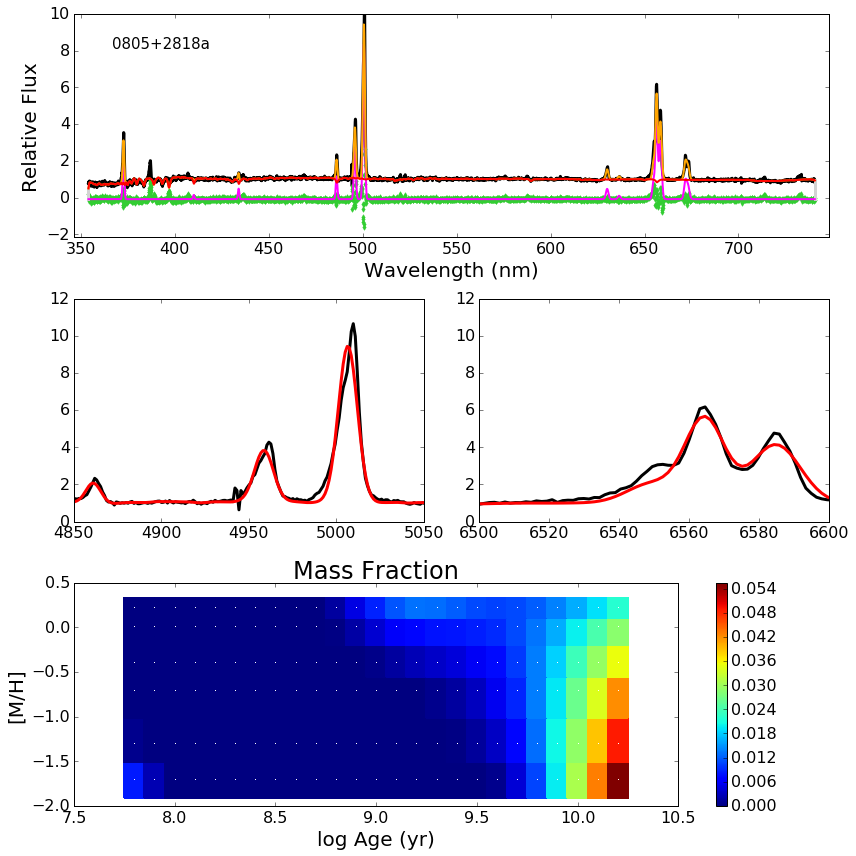

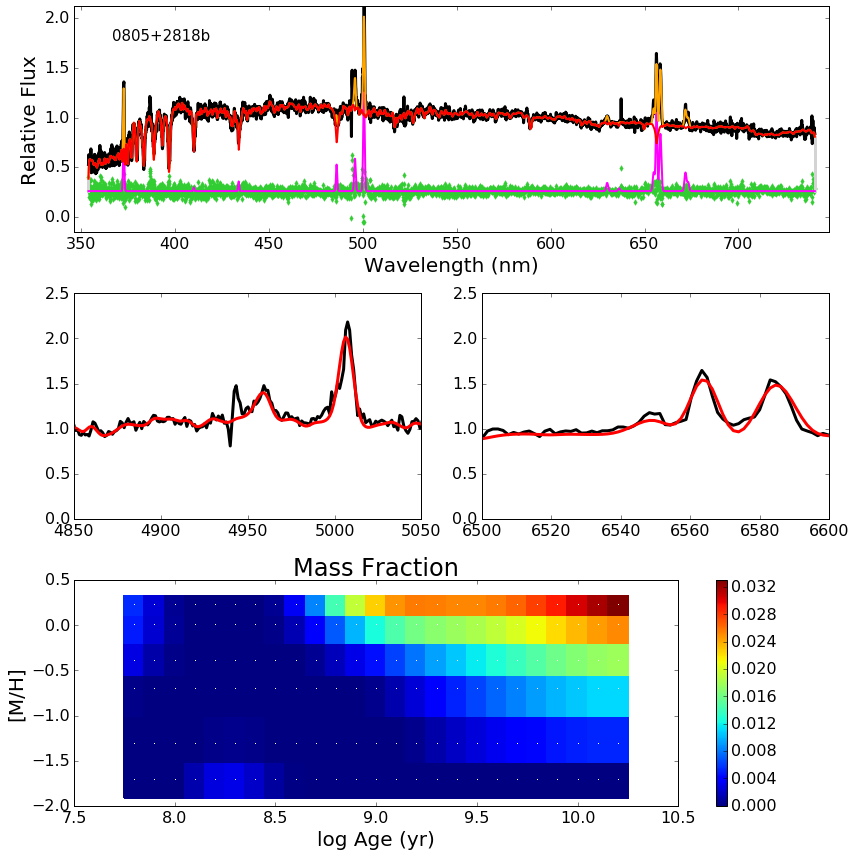

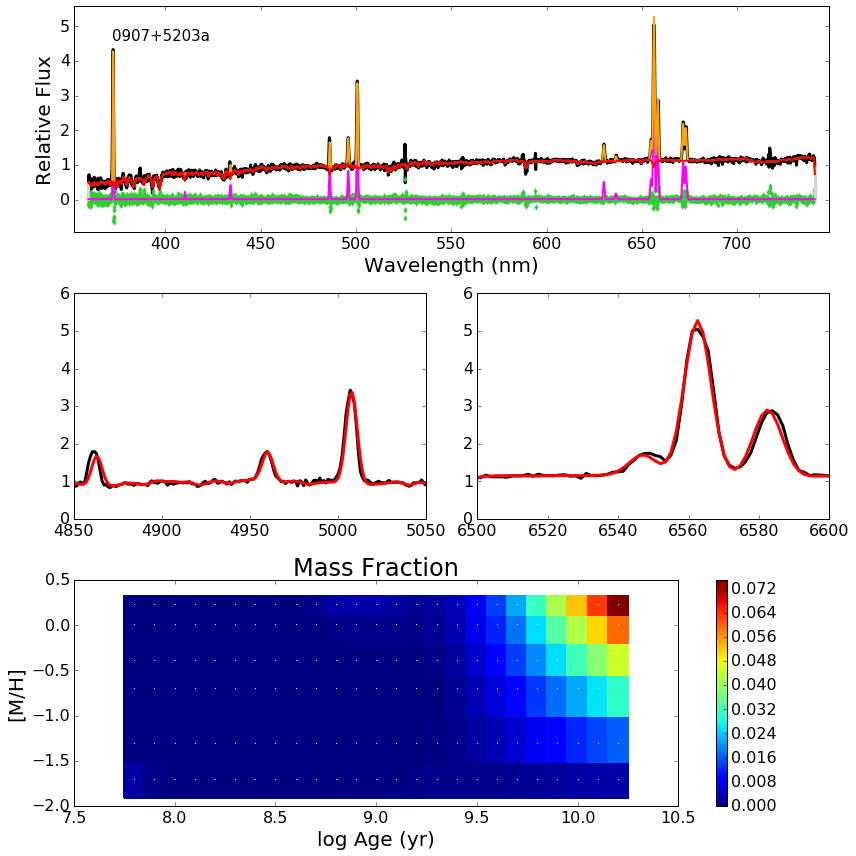

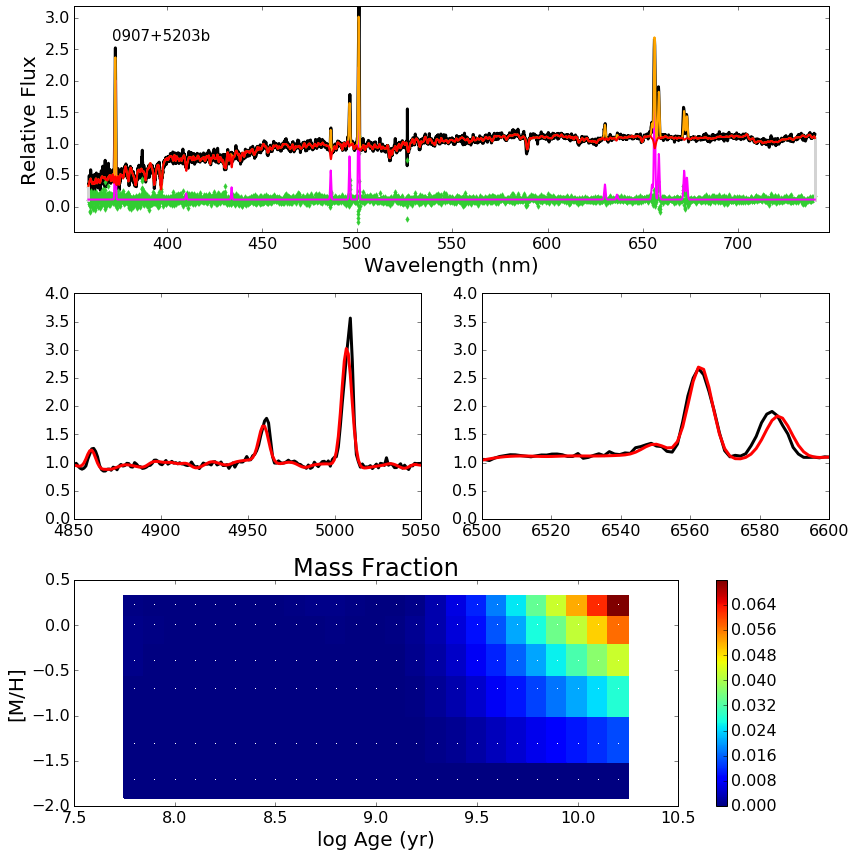

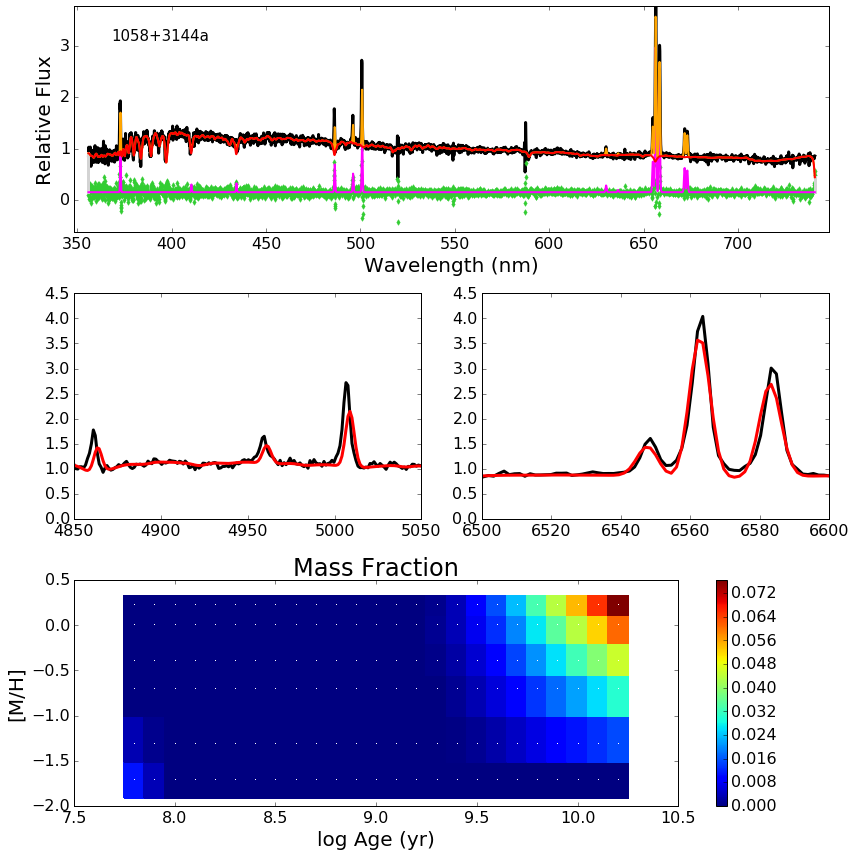

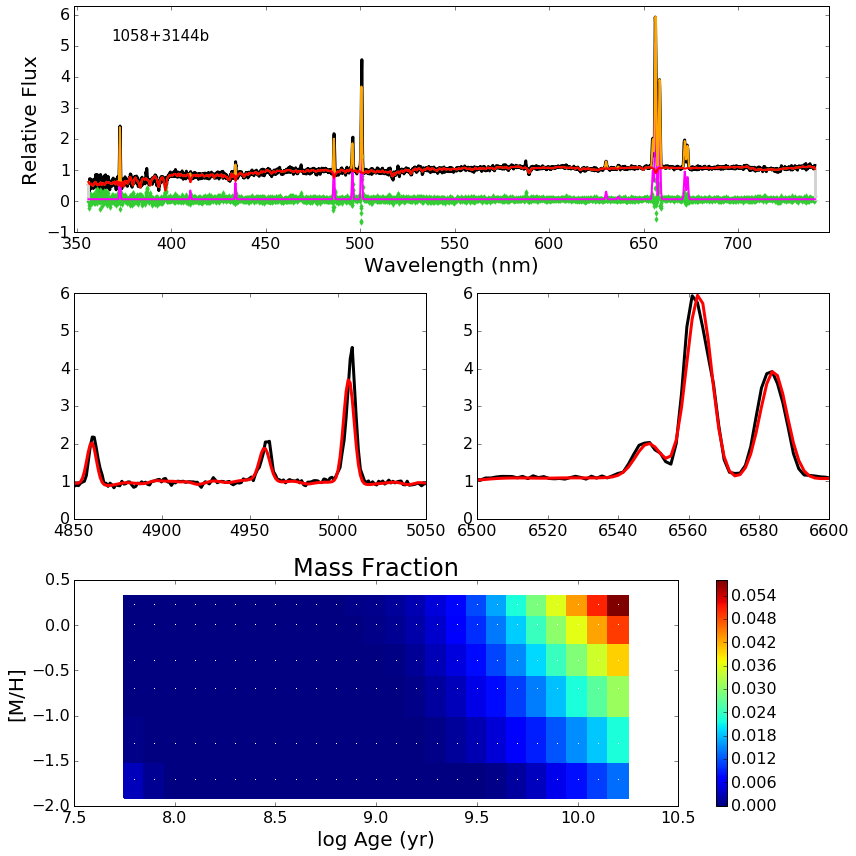

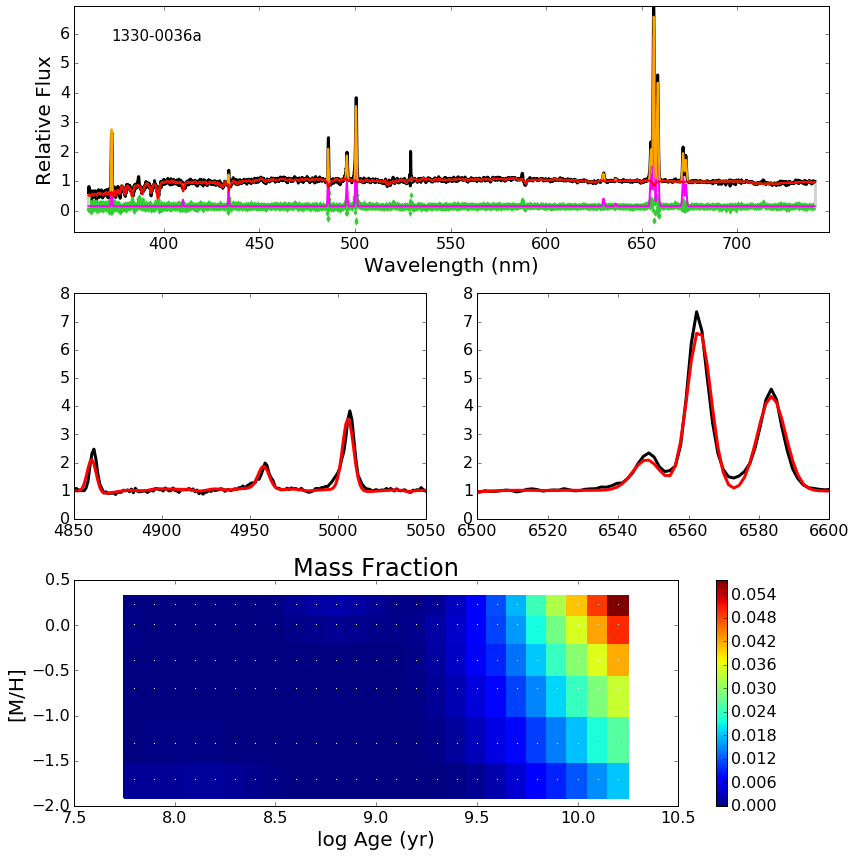

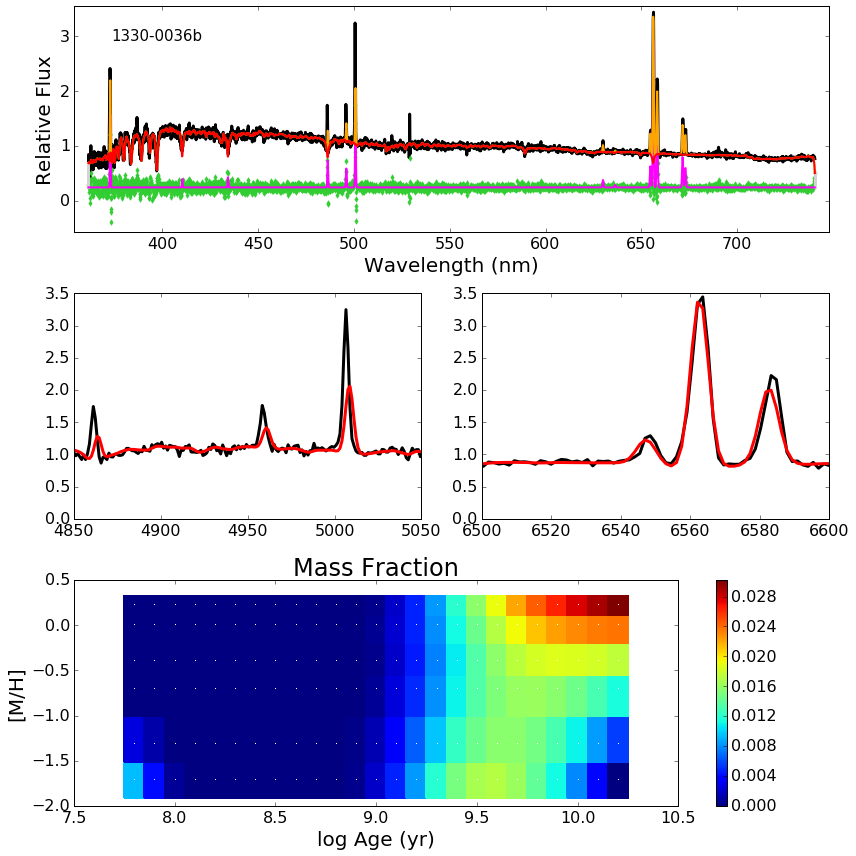

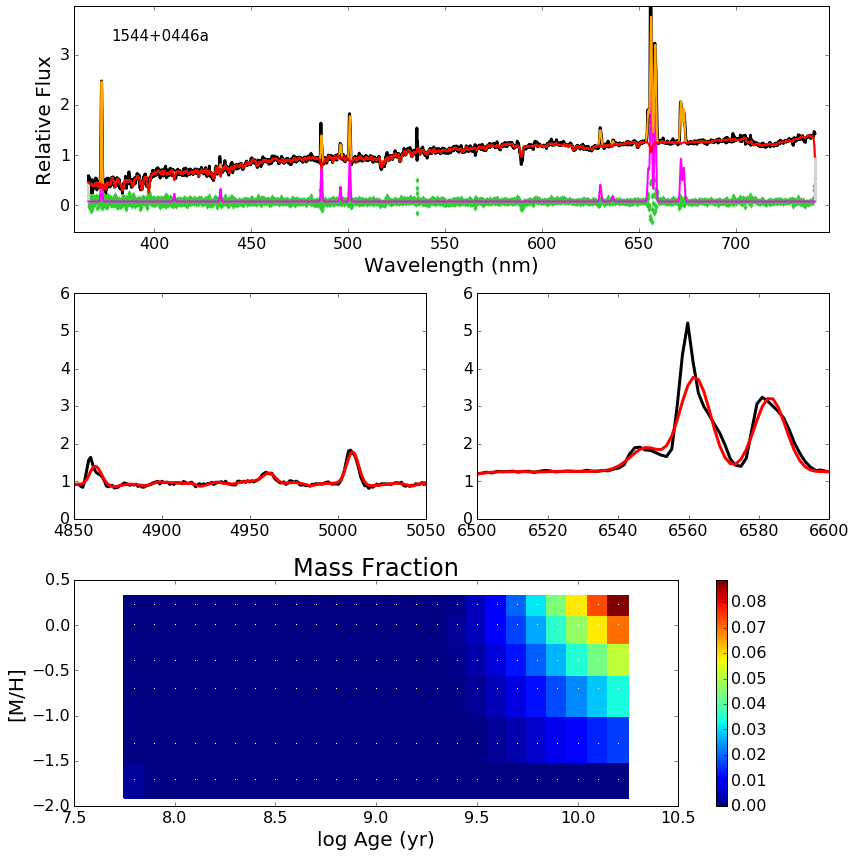

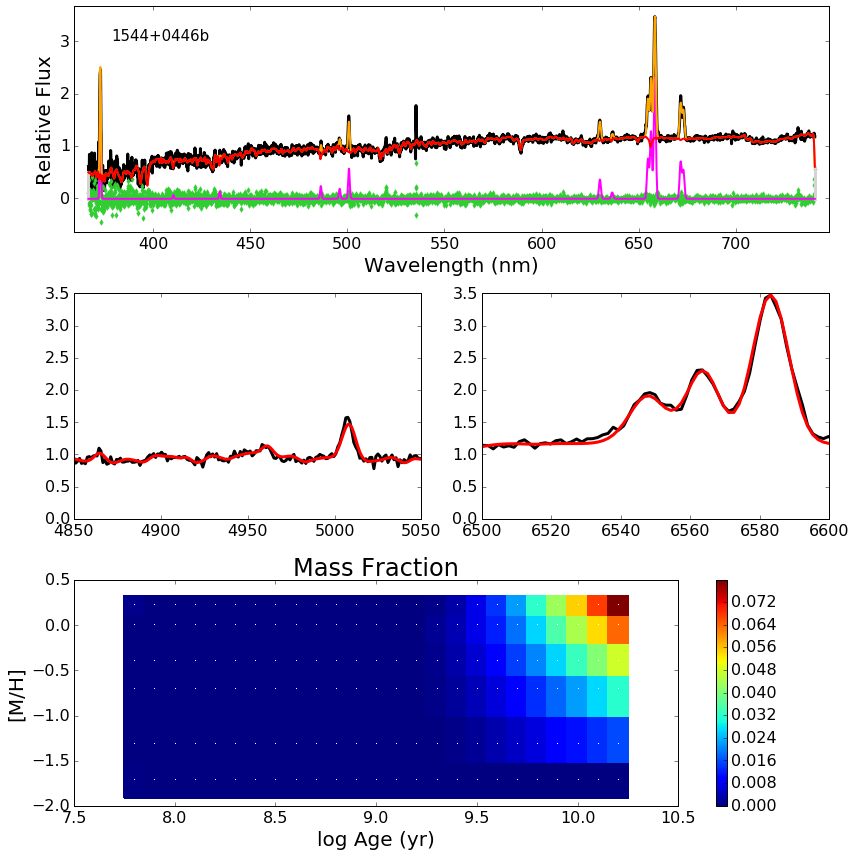

In [66]:
%matplotlib inline
# %load ppxf_example_population_gas_sdss.py
#!/usr/bin/env python
##############################################################################
#
# Usage example for the procedure PPXF, which implements the
# Penalized Pixel-Fitting (pPXF) method originally described in
# Cappellari M., & Emsellem E., 2004, PASP, 116, 138
#     http://adsabs.harvard.edu/abs/2004PASP..116..138C
# and upgraded in Cappellari M., 2017, MNRAS, 466, 798
#     http://adsabs.harvard.edu/abs/2017MNRAS.466..798C
#
# This example shows how to study stellar population and include gas emission
# lines as templates instead of masking them using the GOODPIXELS keyword.
#


##############################################################################

from time import clock
from os import path
import glob, os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import ppxf as ppxf_package
from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util
import ppxf.miles_util as lib

##############################################################################


tie_balmer=False
limit_doublets=False
ppxf_dir = path.dirname(path.realpath(ppxf_package.__file__))

# Read SDSS DR8 galaxy spectrum taken from here http://www.sdss3.org/dr8/
# The spectrum is *already* log rebinned by the SDSS DR8
# pipeline and log_rebin should not be used in this case.
#
#file = ppxf_dir + '/spectra/NGC3522_SDSS_DR8.fits'


for i in zip(glob.glob('/Users/legolason/study/otherwork/meicun/data/*.fits'),\
                range(10),['0805+2818a','0805+2818b','0907+5203a','0907+5203b',\
                    '1058+3144a','1058+3144b','1330-0036a','1330-0036b','1544+0446a','1544+0446b']):
#for i in zip(glob.glob('/Users/legolason/study/otherwork/meicun/data/08b*.fits'),\
#            range(1),['0805+2818a']):

    print '-------------------'+i[2]+'-------------------'
    hdu = fits.open(i[0])
    t = hdu[1].data

    wave1 = 10**t['loglam']/(1.+ float(hdu[2].data['z']))
    flux1 = t['flux']
    err1 = 1./np.sqrt(t['ivar'])
    z = 0.

    # Only use the wavelength range in common between galaxy and stellar library.
    #
    mask = np.where( (wave1 > 3541.) & (wave1 < 7409.) & (err1 <100.), True, False)

    flux = flux1[mask]
    galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
    wave = wave1[mask]
    err = err1[mask]



    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    wave *= np.median(util.vac_to_air(wave)/wave)


    # The noise level is chosen to give Chi^2/DOF=1 without regularization (REGUL=0).
    # A constant noise is not a bad approximation in the fitted wavelength
    # range and reduces the noise in the fit.
    #
    #noise = np.full_like(galaxy, 0.01635)  # Assume constant noise per pixel here
    noise = err*0.04

    # The velocity step was already chosen by the SDSS pipeline
    # and we convert it below to km/s
    #
    c = 299792.458  # speed of light in km/s
    velscale = c*np.log(wave[1]/wave[0])  # eq.(8) of Cappellari (2017)
    FWHM_gal = 2.76  # SDSS has an approximate instrumental resolution FWHM of 2.76A.

    #------------------- Setup templates -----------------------

    pathname = ppxf_dir + '/miles_models/Mun1.30*.fits'
    miles = lib.miles(pathname, velscale, FWHM_gal)


    # The stellar templates are reshaped below into a 2-dim array with each
    # spectrum as a column, however we save the original array dimensions,
    # which are needed to specify the regularization dimensions
    #
    reg_dim = miles.templates.shape[1:]
    stars_templates = miles.templates.reshape(miles.templates.shape[0], -1)

    # See the pPXF documentation for the keyword REGUL,
    regul_err = 0.01  # Desired regularization error

    # Construct a set of Gaussian emission line templates.
    # Estimate the wavelength fitted range in the rest frame.
    #
    lam_range_gal = np.array([np.min(wave), np.max(wave)])/(1 + z)
    gas_templates, gas_names, line_wave = util.emission_lines(
        miles.log_lam_temp, lam_range_gal, FWHM_gal,
        tie_balmer=tie_balmer, limit_doublets=limit_doublets)

    # Combines the stellar and gaseous templates into a single array.
    # During the PPXF fit they will be assigned a different kinematic
    # COMPONENT value
    #

    templates = np.column_stack([stars_templates, gas_templates])

    #-----------------------------------------------------------

    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below as described
    # in PPXF_EXAMPLE_KINEMATICS_SAURON and Sec.2.4 of Cappellari (2017)
    #
    c = 299792.458
    dv = c*(miles.log_lam_temp[0] - np.log(wave[0]))  # eq.(8) of Cappellari (2017)
    vel = c*np.log(1 + z)   # eq.(8) of Cappellari (2017)
    start = [vel, 180.]  # (km/s), starting guess for [V, sigma]

    n_temps = stars_templates.shape[1]
    n_forbidden = np.sum(["[" in a for a in gas_names])  # forbidden lines contain "[*]"
    n_balmer = len(gas_names) - n_forbidden

    # Assign component=0 to the stellar templates, component=1 to the Balmer
    # gas emission lines templates and component=2 to the forbidden lines.
    component = [0]*n_temps + [1]*n_balmer + [2]*n_forbidden
    gas_component = np.array(component) > 0  # gas_component=True for gas templates

    # Fit (V, sig, h3, h4) moments=4 for the stars
    # and (V, sig) moments=2 for the two gas kinematic components
    moments = [4, 2, 2]

    # Adopt the same starting value for the stars and the two gas components
    start = [start, start, start]

    # If the Balmer lines are tied one should allow for gas reddeining.
    # The gas_reddening can be different from the stellar one, if both are fitted.
    gas_reddening = 0 if tie_balmer else None

    # Here the actual fit starts.
    #
    # IMPORTANT: Ideally one would like not to use any polynomial in the fit
    # as the continuum shape contains important information on the population.
    # Unfortunately this is often not feasible, due to small calibration
    # uncertainties in the spectral shape. To avoid affecting the line strength of
    # the spectral features, we exclude additive polynomials (DEGREE=-1) and only use
    # multiplicative ones (MDEGREE=10). This is only recommended for population, not
    # for kinematic extraction, where additive polynomials are always recommended.
    #
    t = clock()
    pp = ppxf(templates, galaxy, noise, velscale, start,
              plot=False, moments=moments, degree=-1, mdegree=10, vsyst=dv,
              lam=wave, clean=False, regul=1./regul_err, reg_dim=reg_dim,
              component=component, gas_component=gas_component,
              gas_names=gas_names, gas_reddening=gas_reddening)

    # When the two Delta Chi^2 below are the same, the solution
    # is the smoothest consistent with the observed spectrum.
    #
    print('Desired Delta Chi^2: %.4g' % np.sqrt(2*galaxy.size))
    print('Current Delta Chi^2: %.4g' % ((pp.chi2 - 1)*galaxy.size))
    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    weights = pp.weights[~gas_component]  # Exclude weights of the gas templates
    weights = weights.reshape(reg_dim)/weights.sum()  # Normalized

    miles.mean_age_metal(weights)
    miles.mass_to_light(weights, band="r")

    # Plot fit results for stars and gas.
    #plt.clf()
    plt.figure(figsize=(12,12))
    plt.style.use('my')
    ax1=plt.subplot(3,2,(1,2))
    pp.plot()
    plt.text(0.05, 0.85,i[2], transform=ax1.transAxes,fontsize=15)

    # Plot stellar population mass fraction distribution
    plt.subplot(323)
    plt.plot(pp.lam,pp.galaxy,'k')
    plt.plot(pp.lam,pp.bestfit,'r')
    plt.xlim(4850,5050)
    
    plt.subplot(324)
    plt.plot(pp.lam,pp.galaxy,'k')
    plt.plot(pp.lam,pp.bestfit,'r')
    plt.xlim(6500,6600)
    
    plt.subplot(3,2,(5,6))
    
    miles.plot(weights)
    plt.tight_layout()
    #plt.savefig('/Users/legolason/study/otherwork/meicun/fig/'+i[2]+'.eps')

##############################################################################



Best Fit:       Vel     sigma        h3        h4
 comp. 0:       180        44     0.006    -0.009
chi2/DOF: 116.9
method = capfit ; Jac calls: 6 ; Func calls: 33 ; Status: 2
Nonzero Templates:  2  /  150
Formal errors:
     dV    dsigma   dh3      dh4
      65 1.2e+02     1.1     1.4
Elapsed time in PPXF: 2.50 s


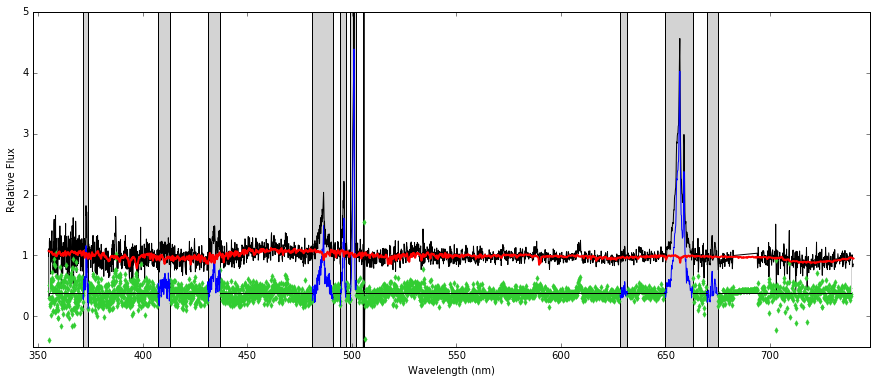

In [2]:
%matplotlib inline
import glob
from time import clock
from os import path

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import ppxf as ppxf_package
from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util



ppxf_dir = path.dirname(path.realpath(ppxf_package.__file__))



file = ppxf_dir + '/spectra/spec-0305-51613-0012.fits'
hdu = fits.open(file)
t = hdu['COADD'].data

wave1 = 10**t['loglam']/(1.+ float(hdu[2].data['z']))
flux1 = t['flux']
#err1 = 1./np.sqrt(t['ivar'])
z = 0.

# Only use the wavelength range in common between galaxy and stellar library.
#
mask = np.where( (wave1 > 3550.) & (wave1 < 7400.), True, False)

flux = flux1[mask]
galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
lam_gal = wave1[mask]
noise = np.full_like(galaxy, 0.0166)




c = 299792.458                  # speed of light in km/s
frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel

# If the galaxy is at significant redshift, one should bring the galaxy
# spectrum roughly to the rest-frame wavelength, before calling pPXF
# (See Sec2.4 of Cappellari 2017). In practice there is no
# need to modify the spectrum in any way, given that a red shift
# corresponds to a linear shift of the log-rebinned spectrum.
# One just needs to compute the wavelength range in the rest-frame
# and adjust the instrumental resolution of the galaxy observations.
# This is done with the following three commented lines:
#
# lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
# fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

# Read the list of filenames from the Single Stellar Population library
# by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
# of the library is included for this example with permission
vazdekis = glob.glob(ppxf_dir + '/miles_models/Mun1.30Z*.fits')
fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

# Extract the wavelength range and logarithmically rebin one spectrum
# to the same velocity scale of the SDSS galaxy spectrum, to determine
# the size needed for the array which will contain the template spectra.
#
hdu = fits.open(vazdekis[0])
ssp = hdu[0].data
h2 = hdu[0].header
lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
templates = np.empty((sspNew.size, len(vazdekis)))


# Interpolates the galaxy spectral resolution at the location of every pixel
# of the templates. Outside the range of the galaxy spectrum the resolution
# will be extrapolated, but this is irrelevant as those pixels cannot be
# used in the fit anyway.
fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)


# Convolve the whole Vazdekis library of spectral templates
# with the quadratic difference between the SDSS and the
# Vazdekis instrumental resolution. Logarithmically rebin
# and store each template as a column in the array TEMPLATES.

# Quadratic sigma difference in pixels Vazdekis --> SDSS
# The formula below is rigorously valid if the shapes of the
# instrumental spectral profiles are well approximated by Gaussians.
#
# In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
# In principle it should never happen and a higher resolution template should be used.
#
fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

for j, fname in enumerate(vazdekis):
    
    hdu = fits.open(fname)
    ssp = hdu[0].data
    ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
    sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
    templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates

# The galaxy and the template spectra do not have the same starting wavelength.
# For this reason an extra velocity shift DV has to be applied to the template
# to fit the galaxy spectrum. We remove this artificial shift by using the
# keyword VSYST in the call to PPXF below, so that all velocities are
# measured with respect to DV. This assume the redshift is negligible.
# In the case of a high-redshift galaxy one should de-redshift its
# wavelength to the rest frame before using the line below (see above).
#
c = 299792.458
dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z, 'QSO')

# Here the actual fit starts. The best fit is plotted on the screen.
# Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
#
vel = c*np.log(1 + z)   # eq.(8) of Cappellari (2017)
start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
t = clock()

pp = ppxf(templates, galaxy, noise, velscale, start,
          goodpixels=goodpixels,plot=False, moments=4,
          degree=10, vsyst=dv, clean=False, lam=lam_gal)

plt.figure(figsize=(15,6))
pp.plot()
plt.plot(lam_gal[goodpixels],galaxy[goodpixels])
plt.ylim(-0.5,5)
#print("Formal errors:")
#print("     dV    dsigma   dh3      dh4")
#print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

print('Elapsed time in PPXF: %.2f s' % (clock() - t))



